>Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('knn_test_data.csv')

> Implementation of K - Nearest Neighbours

In [6]:
# Define the test point
test_point = np.array([4.5, 3.5])

# Calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Calculate distances from the test point to all points in the dataset
df['Distance'] = df.apply(lambda row: euclidean_distance(test_point, np.array([row['Feature1'], row['Feature2']])), axis=1)

# Find the K nearest neighbors
K = 3
nearest_neighbors = df.nsmallest(K, 'Distance')

# Voting for classification
most_common_label = nearest_neighbors['Label'].mode()[0]

# Print the results
print("Nearest Neighbors:")
print(nearest_neighbors)
print("\nPredicted Label for Test Point ({}): {}".format(test_point, most_common_label))


Nearest Neighbors:
   Feature1  Feature2   Label  Distance
3       4.0       3.9  Class2  0.640312
4       5.1       2.7  Class1  1.000000
2       3.3       4.4  Class1  1.500000

Predicted Label for Test Point ([4.5 3.5]): Class1


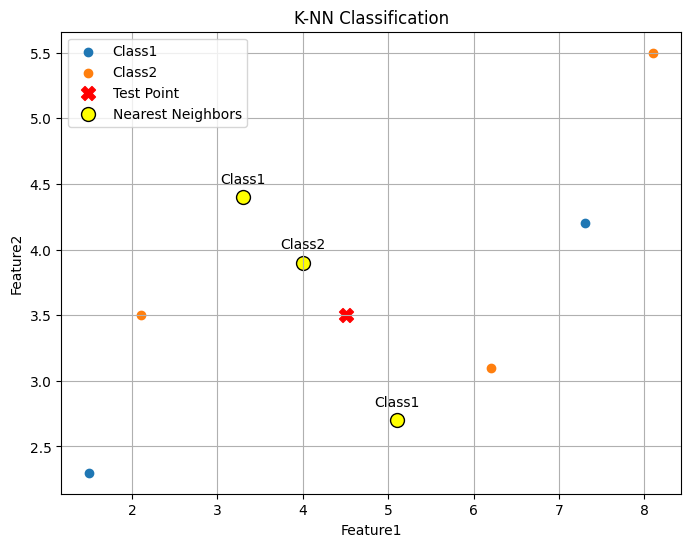

In [7]:
# Plotting the data points
plt.figure(figsize=(8, 6))

# Plot all data points
for label in df['Label'].unique():
    subset = df[df['Label'] == label]
    plt.scatter(subset['Feature1'], subset['Feature2'], label=label)

# Highlight the test point
plt.scatter(test_point[0], test_point[1], color='red', marker='X', s=100, label='Test Point')

# Highlight the nearest neighbors
plt.scatter(nearest_neighbors['Feature1'], nearest_neighbors['Feature2'], color='yellow', edgecolor='black', s=100, label='Nearest Neighbors')

# Annotate the nearest neighbors
for idx, row in nearest_neighbors.iterrows():
    plt.annotate(f"{row['Label']}", (row['Feature1'], row['Feature2']), textcoords="offset points", xytext=(0,10), ha='center')

# Adding labels and legend
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('K-NN Classification')
plt.legend()
plt.grid(True)
plt.show()